<img src="../images/QISKit-c.gif" alt="Note: In order for images to show up in this jupyter notebook you need to select File => Trusted Notebook" width="250 px" align="left">

## _*Quantum Teleportation*_ 

The latest version of this notebook is available on https://github.com/IBM/qiskit-sdk-py/tree/master/scripts.

For more information about how to use the IBM Q experience (QX), consult the [IBM Q experience tutorials](https://quantumexperience.ng.bluemix.net/qstage/#/tutorial?sectionId=c59b3710b928891a1420190148a72cce&pageIndex=0), or check out the [community](https://quantumexperience.ng.bluemix.net/qstage/#/community).
***
### Contributor
Anna Phan, Jay Gambetta

## Introduction

Quantum teleportation is a protocol to transmit quantum states from one location to another, assisted by previously shared entangled states and a classical communication channel. It was devised by Charles H. Bennett (IBM), Gilles Brassard, Claude Crépeau, Richard Jozsa, Asher Peres and William K. Wootters in [1993](https://journals.aps.org/prl/abstract/10.1103/PhysRevLett.70.1895). It was first demonstrated with photons in [1997](http://www.nature.com/nature/journal/v390/n6660/abs/390575a0.html), and has since been realised in [atoms](http://www.nature.com/nphys/journal/v9/n7/abs/nphys2631.html), [ions](http://www.nature.com/nature/journal/v429/n6993/full/nature02570.html, http://www.nature.com/nature/journal/v429/n6993/full/nature02608.html), [electrons](http://science.sciencemag.org/content/345/6196/532) and [superconducting circuits](http://www.nature.com/nature/journal/v500/n7462/full/nature12422.html). The [record](http://www.nature.com/nature/journal/v489/n7415/full/nature11472.html) distance for quantum teleportation is 143km in 2012 via satellite.

The protocol starts out with a shared entangled state between the sender (Alice) and the receiver (Bob):
$$|\psi\rangle_{AB} = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B)$$
The first qubit, denoted by subscript $A$, belongs to Alice and the second qubit, $B$, belongs to Bob.

Alice has a quantum state, that she wants to convey to Bob:
$$|\psi\rangle_{C} = \alpha|0\rangle_C + \beta|1\rangle_C$$

At this point, Alice has two quantum states ($C$, the one she wants to teleport, and $A$, one of the entangled pair), and Bob has one quantum state. The total state of the system is given by:
$$|\psi\rangle_{AB} \otimes |\psi\rangle_C = \frac{1}{\sqrt{2}}(|0\rangle_A \otimes |0\rangle_B + |1\rangle_A \otimes |1\rangle_B) \otimes (\alpha|0_C\rangle + \beta|1_C\rangle)$$
or, in the Bell basis:
$$|\psi\rangle_{AB} \otimes |\psi\rangle_C = \frac{1}{2}[
|\Phi^+\rangle_{AC}\otimes(\alpha|0\rangle_B + \beta|1\rangle_B) + 
|\Phi^-\rangle_{AC}\otimes(\alpha|0\rangle_B - \beta|1\rangle_B) + \\
|\Psi^+\rangle_{AC}\otimes(\alpha|0\rangle_B + \beta|1\rangle_B) + 
|\Psi^-\rangle_{AC}\otimes(\alpha|0\rangle_B - \beta|1\rangle_B) ]$$
where:
$$|0\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}}(|\Phi^+\rangle + |\Phi^-\rangle), 
|0\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}}(|\Psi^+\rangle + |\Psi^-\rangle)\\
|1\rangle \otimes |0\rangle = \frac{1}{\sqrt{2}}(|\Psi^+\rangle - |\Psi^-\rangle), 
|1\rangle \otimes |1\rangle = \frac{1}{\sqrt{2}}(|\Phi^+\rangle - |\Phi^-\rangle)$$

Alice now measures her two quantum states, $A$ and $C$, in the Bell basis. This will collapse the three state system into the one of the following four states with equal probability:
- $|\Phi^+\rangle_{AC}\otimes(\alpha|0\rangle_B + \beta|1\rangle_B)$
- $|\Phi^-\rangle_{AC}\otimes(\alpha|0\rangle_B - \beta|1\rangle_B)$
- $|\Psi^+\rangle_{AC}\otimes(\alpha|0\rangle_B + \beta|1\rangle_B)$ 
- $|\Psi^-\rangle_{AC}\otimes(\alpha|0\rangle_B - \beta|1\rangle_B)$

Alice's two states are now entangled with each other, and the entanglement originally shared between Alice's and Bob's states is now broken. Note how Bob's qubit is now in a state that resembles the state to be teleported. 

The result of Alice's measurement tells her which of the above four states the system is in, $|\Phi^+\rangle_{AC}, |\Phi^-\rangle_{AC}, |\Psi^-\rangle_{AC}$ or $|\Psi^-\rangle_{AC}$. She now sends her result to Bob through a classical channel. Two classical bits can communicate which of the four results she obtained.

After Bob receives the message from Alice, he will know which of the four states his particle is in. Using this information, he performs a unitary operation on his particle to transform it to the desired state $\alpha|0\rangle_B - \beta|1\rangle_B$:
- If he receives $|\Phi^+\rangle_{AC}$: Bob applies $I = \begin{bmatrix} 1 & 0 \\ 0 & 1 \end{bmatrix}$ to his quantum state. 
- If he receives $|\Phi^-\rangle_{AC}$: Bob applies $X = \begin{bmatrix} 0 & 1 \\ 1 & 0 \end{bmatrix}$ to his quantum state. 
- If he receives $|\Psi^+\rangle_{AC}$: Bob applies $Z = \begin{bmatrix} 1 & 0 \\ 0 & -1 \end{bmatrix}$ to his quantum state. 
- If he receives $|\Psi^-\rangle_{AC}$: Bob applies $XZ = \begin{bmatrix} 0 & -1 \\ 1 & 0 \end{bmatrix}$ to his quantum state. 

Teleportation of $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$ is thus achieved. 

## Implementation
The first step is to import the required packages to run the Quantum Experience and set up our quantum program.

In [1]:
# Checking the version of Python; the Quantum Experience currently only supports version 3
import sys
if sys.version_info < (3,0):
    raise Exception("Please use Python version 3 or greater.")

import numpy as np


# Importing QISKit
import sys
sys.path.append("../../")
from qiskit import QuantumCircuit, QuantumProgram
import Qconfig

# Import basic plotting tools
from tools.vizualization import plot_histogram

# Quantum program setup 
Q_program = QuantumProgram()
Q_program.set_api(Qconfig.APItoken, Qconfig.config["url"]) # set the APIToken and API url

Recall from [superposition and entanglement](superposition_and_entanglement.ipynb) and [entanglement revisited](entanglement_revisited.ipynb), the steps to make the shared entangled state $|\psi\rangle = \frac{1}{\sqrt{2}}(|0_A 0_B\rangle + |1_A 1_B\rangle)$ are:
1. Start with an initial state $|0_A 0_B\rangle$
2. Apply $H = \frac{1}{\sqrt{2}}\begin{pmatrix} 1 & 1 \\ 1 & -1 \end{pmatrix}$ on $q_A$ 
3. Then a $CNOT = \begin{pmatrix} 1 & 0 & 0 & 0\\ 0 & 0 & 0 & 1\\0& 0& 1 & 0\\0 & 1 & 0 & 0 \end{pmatrix}$ from $q_A$ to $q_B$

With $q_A = q_1$ and $q_B = q_2$, this looks like::

In [2]:
# Creating registers
q = Q_program.create_quantum_register("q", 3)
c0 = Q_program.create_classical_register("c0", 1)
c1 = Q_program.create_classical_register("c1", 1)
c2 = Q_program.create_classical_register("c2", 1)

# Quantum circuit to make the shared entangled state 
teleport = Q_program.create_circuit("teleport", [q], [c0,c1,c2])
teleport.h(q[1])
teleport.cx(q[1], q[2])

Alice then prepares her quantum state to be teleported, $|\psi\rangle_{C} = \alpha|0\rangle_C + \beta|1\rangle_C$. In this experiment, $\alpha = \cos(\frac{\theta}{2})$ and $\beta = \sin(\frac{\theta}{2})$ where $\theta = \frac{\pi}{4}$. This state can be created by applying a rotation around the y axis:
$R_y(\theta)$ on $q_C$

With $q_C = q_0$, this looks like:

In [3]:
teleport.ry(np.pi/4,q[0])

Alice now applies $CNOT$ to her two quantum states $q_A(q_1)$ and $q_C(q_0)$, followed by an H, to entangle them and project them into the Bell basis:

In [4]:
teleport.cx(q[0], q[1])
teleport.h(q[0])
teleport.barrier()

She now measures her two quantum states $q_A(q_1)$ and $q_C(q_0)$:

In [5]:
teleport.measure(q[0], c0[0])
teleport.measure(q[1], c1[0])

circuits = ["teleport"]
print(Q_program.get_qasms(circuits)[0])

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c0[1];
creg c1[1];
creg c2[1];
h q[1];
cx q[1],q[2];
ry(0.785398163397448) q[0];
cx q[0],q[1];
h q[0];
barrier q[0],q[1],q[2];
measure q[0] -> c0[0];
measure q[1] -> c1[0];



Depending on the results of these measurements, Bob has to apply an $X$ or $Z$ or both to his quantum state $q_B(q_2)$:

In [6]:
teleport.z(q[2]).c_if(c0, 1)
teleport.x(q[2]).c_if(c1, 1)

His state is now the same as the state Alice prepared earlier, which can be verified by measurement:

In [7]:
teleport.measure(q[2], c2[0])

Let's now create, execute the quantum circuits on the simulator as the real device does not support if yet, and plot the results:

In [8]:
circuits = ["teleport"]
print(Q_program.get_qasms(circuits)[0])

OPENQASM 2.0;
include "qelib1.inc";
qreg q[3];
creg c0[1];
creg c1[1];
creg c2[1];
h q[1];
cx q[1],q[2];
ry(0.785398163397448) q[0];
cx q[0],q[1];
h q[0];
barrier q[0],q[1],q[2];
measure q[0] -> c0[0];
measure q[1] -> c1[0];
if(c0==1) z q[2];
if(c1==1) x q[2];
measure q[2] -> c2[0];



In [9]:
# backend = 'ibmqx2' # the backend to run on
backend = 'local_qasm_simulator' 
shots = 1024 # the number of shots in the experiment 

Q_program.execute(circuits, backend=backend, shots=shots, max_credits=3, wait=10, timeout=240)

{'result': 'all done', 'status': 'COMPLETED'}

Need to manipulate the data to understand these results better, first only plotting the results of Alice's measurement:  

Note each classical register is seperated by a space and the order is c2 c1 c0.

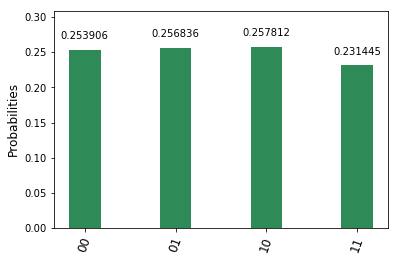

In [10]:
data = Q_program.get_counts("teleport")
alice = {}
alice['00'] = data['0 0 0'] + data['1 0 0']
alice['10'] = data['0 1 0'] + data['1 1 0']
alice['01'] = data['0 0 1'] + data['1 0 1']
alice['11'] = data['0 1 1'] + data['1 1 1']
plot_histogram(alice)

As expected, the probabilities are roughly equal.  

Now, manipulate the data to plot the result of Bob's measurement:

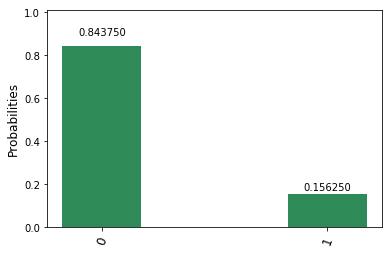

In [11]:
bob = {}
bob['0'] = data['0 0 0'] + data['0 1 0'] +  data['0 0 1'] + data['0 1 1']
bob['1'] = data['1 0 0'] + data['1 1 0'] +  data['1 0 1'] + data['1 1 1']
plot_histogram(bob)

As expected $|\alpha|^2 = |\cos(\frac{\pi}{8})|^2 \approx 0.854$ (the probably of measuring 0) and $|\beta|^2 = |\sin(\frac{\pi}{8})|^2 \approx 0.146$ (the probability of measuring 1).